<a href="https://colab.research.google.com/github/dragoa/AI/blob/main/SecML/00_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN classification
Let's try to implement a KNN classification algorithm for recognising digits from the MNIST dataset.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.model_selection import train_test_split

import numpy as np
import cv2
import imutils

In [ ]:
# Load the MNIST dataset
mnist = datasets.load_digits()

In [ ]:
# Split the dataset into 3 parts: learning, validation, testing
Xlv, Xt, ylv, yt = train_test_split(mnist.data, mnist.target, test_size=.1, random_state=42)

# show the sizes of each data split
print("training data points: {}".format(len(Xlv)))
print("testing data points: {}".format(len(Xt)))

training data points: 1617
testing data points: 180


In [ ]:
from sklearn.model_selection import GridSearchCV
"""
We want to find which is the best value for k between 0 and 30 and step=2
"""
ytt = np.asarray([]) # All the true values
ypp = np.asarray([]) # All the predictions

for k in range(0,30,2):
  # grid of values that we are searching
  grid = {'n_neighbors': range(1,30,2)}

  # what we want to minimize
  MS = GridSearchCV(estimator = KNeighborsClassifier(),
                    param_grid = grid,
                    scoring = 'neg_mean_absolute_error',
                    cv = 10,
                    error_score='raise')

  # I apply the model selection on my data
  H = MS.fit(Xlv,ylv)
  # I put the best hyperparameters that I found
  M = KNeighborsClassifier(n_neighbors=H.best_params_['n_neighbors'])
  # I retrain my model
  M.fit(Xlv,ylv)
  # Final prediction
  yp = M.predict(Xt)

  ytt = np.concatenate((ytt,yt),axis=0)
  ypp = np.concatenate((ypp,yp),axis=0)
  print(ytt.shape)

(180,)
(360,)
(540,)
(720,)
(900,)
(1080,)
(1260,)
(1440,)
(1620,)
(1800,)
(1980,)
(2160,)
(2340,)
(2520,)
(2700,)


In [ ]:
np.mean(np.abs(ytt-ypp))

0.07222222222222222

In [ ]:
predictions = M.predict(Xt)

# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(yt, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17
           3       0.94      1.00      0.97        17
           4       0.96      1.00      0.98        25
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        19
           7       1.00      0.95      0.97        19
           8       1.00      1.00      1.00         8
           9       0.96      0.92      0.94        25

    accuracy                           0.98       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.98      0.98      0.98       180



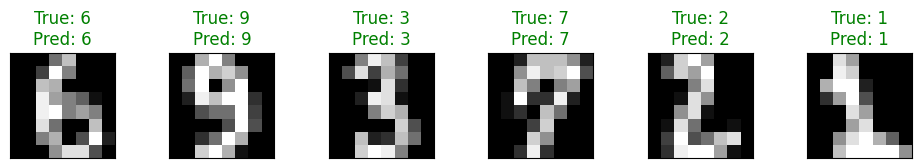

In [46]:
import matplotlib.pyplot as plt

n_display = 6

plt.figure(figsize=(n_display * 2, 3))
for idx in range(n_display):
    plt.subplot(2, n_display, idx + 1)
    plt.xticks([])
    plt.yticks([])
    img = Xt[idx].reshape((8, 8))  # Reshape the image to 28x28
    plt.imshow(img, cmap='gray')
    title = f"True: {yt[idx]}\nPred: {M.predict(Xt)[idx]}"
    color = "green" if yt[idx] == M.predict(Xt)[idx] else "red"
    plt.title(title, color=color)

plt.show()